# Real-wold pytorch

## Face engrave

In [1]:
import torch
import numpy as np

In [2]:
print('GPU: ',torch.cuda.is_available())
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

GPU:  True


In [3]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [4]:
import os
import sys

cheetah

In [5]:
script_path = os.path.dirname(os.path.abspath('__file__'))
sys.path.append(os.path.join(script_path))

In [6]:
data_path = os.path.join(script_path,'data','matching','cheetah.jpg')
save_path = os.path.join(script_path,'out','matching')

In [7]:
im_size = 90
from PIL import Image
img = Image.open(data_path)
img.thumbnail((im_size,im_size), Image.ANTIALIAS)  # resizes image in-place
# imgplot = plt.imshow(img)
pix = torch.from_numpy(np.array(img))

C:\Users\zhangchen\AppData\Local\Temp\ipykernel_12036\3653322328.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img.thumbnail((im_size,im_size), Image.ANTIALIAS)  # resizes image in-place


In [8]:
pix.shape #cheetah

torch.Size([90, 83, 3])

^^^^^^^  
cheetah

In [9]:
data_path = os.path.join(script_path,'data','ORL','sel_29_3.jpg')
data_path_sus = os.path.join(script_path,'data','ORL','sel_1_1.jpg')
save_path = os.path.join(script_path,'out','ORL')

In [10]:
im_size = 90

from PIL import Image
# load and resize image
img = Image.open(data_path)
img.thumbnail((im_size,im_size), Image.ANTIALIAS)  # resizes image in-place
# imgplot = plt.imshow(img)

img_sus = Image.open(data_path_sus)
img_sus.thumbnail((im_size,im_size), Image.ANTIALIAS)  # resizes image in-place

pix = torch.from_numpy(np.array(img))
pix_sus = torch.from_numpy(np.array(img_sus))

C:\Users\zhangchen\AppData\Local\Temp\ipykernel_12036\2564709547.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img.thumbnail((im_size,im_size), Image.ANTIALIAS)  # resizes image in-place
C:\Users\zhangchen\AppData\Local\Temp\ipykernel_12036\2564709547.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img_sus.thumbnail((im_size,im_size), Image.ANTIALIAS)  # resizes image in-place


In [11]:
pix.shape

torch.Size([80, 70])

In [12]:
min_side = np.min(pix[:, :].shape) 
pix = pix[0:min_side, 0:min_side] #not rescale
pix_sus = pix_sus[0:min_side, 0:min_side] #not rescale

In [13]:
ini_face = pix.type(torch.float64)
sus_face = pix_sus.type(torch.float64)

import torchvision.transforms as transforms
transform = transforms.Compose([ transforms.Normalize(torch.mean(ini_face),torch.std(ini_face))])
ini_face = transform(torch.unsqueeze(ini_face, 0))
ini_face = torch.squeeze(ini_face)

transform = transforms.Compose([ transforms.Normalize(torch.mean(sus_face),torch.std(sus_face))])
sus_face = transform(torch.unsqueeze(sus_face, 0))
sus_face = torch.squeeze(sus_face)

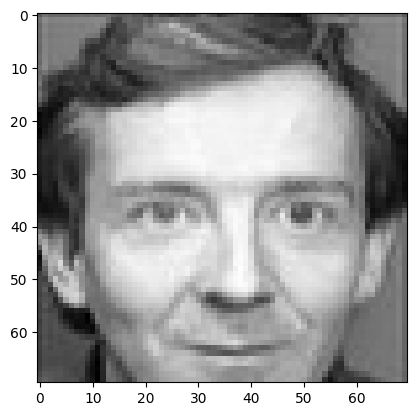

In [14]:
import matplotlib.pyplot as plt
plt.imshow(ini_face,cmap='gray')

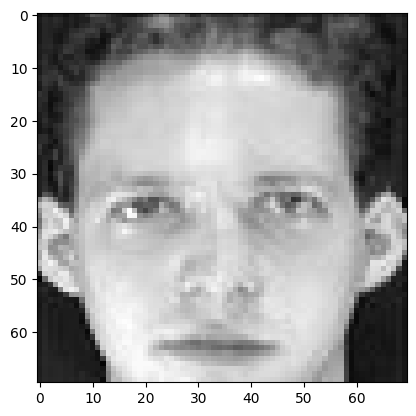

In [15]:
import matplotlib.pyplot as plt
plt.imshow(sus_face,cmap='gray')

In [16]:
# Function for figure
def f_ini_plt(X,Y):
    obj = ini_face
    Z = obj[X,Y] # here we need to change the type to ap.array
    return Z

In [17]:
# Function for figure
def f_sus_plt(X,Y):
    obj = sus_face
    Z = obj[X,Y] # here we need to change the type to ap.array
    return Z

C:\Users\zhangchen\AppData\Local\Temp\ipykernel_12036\3962093625.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  surfini = ax.contourf(Y, -X, Z,
C:\Users\zhangchen\AppData\Local\Temp\ipykernel_12036\3962093625.py:23: UserWarning: The following kwargs were not used by contour: 'linewidth'
  surfsus = ax.contourf(Y, -X, Z,


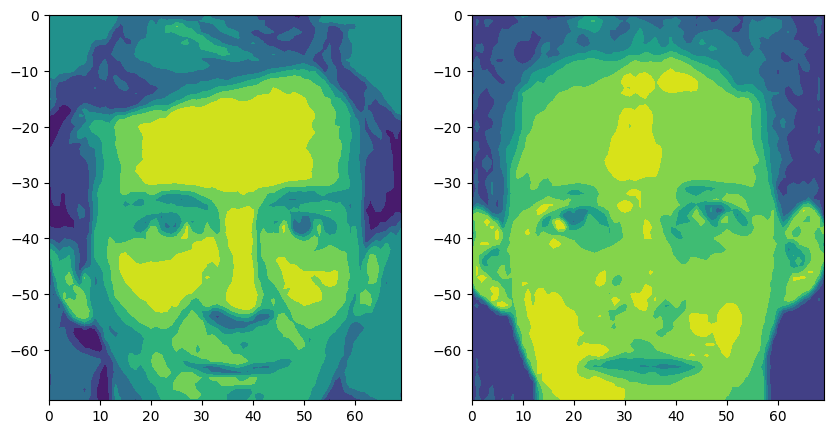

In [18]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig = plt.figure(figsize=(10,5))

# Make data.
X = np.arange(0, 70, 1)
Y = np.arange(0, 70, 1)
X, Y = np.meshgrid(X, Y)

# Plot the surface 0
Z = np.array(f_ini_plt(X, Y))
ax = fig.add_subplot(1, 2, 1)#, projection='3d'
surfini = ax.contourf(Y, -X, Z,
                       linewidth=0, antialiased=False)
#ax.view_init(75,45)
#fig.colorbar(surfini, shrink=0.5, aspect=5) # Add a color bar which maps values to colors.

# Plot the surface 0 replacement
Z = np.array(f_sus_plt(X, Y))
ax = fig.add_subplot(1, 2, 2)#, projection='3d'
surfsus = ax.contourf(Y, -X, Z,
                       linewidth=0, antialiased=False)
#ax.view_init(75,45)
#fig.colorbar(surfsus, shrink=0.5, aspect=5) # Add a color bar which maps values to colors.


plt.show()

## Train Model

In [19]:
import time
eta = 0.05  # Learning rate.
num_iterations = 60000  # Iterations for gradient descent.
seed = 0  # Random seed.

# Seed for reproducibility.
np.random.seed(seed)

# Obtain pixels.
x1 = torch.arange(0, min_side, 1)
x2 = torch.arange(0, min_side, 1)
x1, x2 = torch.meshgrid(x1, x2)
pixels = torch.vstack((x1.flatten(),x2.flatten())).T.cuda()

D:\Anaconda\envs\mytorch\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


### Square loss $L[f]=(y_i-f(x_i))^2$  $DL[f]=-2(y_i-f(x_i))K(x_i, \cdot)$

In [20]:
# The kernel we use.
def rbf_kernel(x_1, x_2):
    '''
    x_1: [[13,15],[12,17]]
    x_2: [[10,16],[14,14],[11,13]]
    output: #row - #example
            #col - #list
        [[4.2484e-18, 3.3546e-04, 1.2664e-14],
        [2.0612e-09, 2.6103e-23, 2.9375e-30]]
    interleave: a,b,c -> a,a,b,b,c,c for cross norm
    reshape: split it to do block minus '-'
    '''
    big_x1 = torch.repeat_interleave(x_1,len(x_2),dim=0).reshape(len(x_1),len(x_2),2).cuda()
    #print(big_x1)
    #print(big_x1 - x_2)
    norm = torch.norm ((big_x1 - x_2).type(dtype), dim=2)
    #print(norm)
    return torch.exp(-(((norm) / 0.5) ** 2)).cuda()

In [21]:
def f_0(example):
    '''
    f_0: '8'
    obj: 28*28 initial figure random
    example: [[x,y],[x,y]]
    output: [label1,label2]
    '''
    obj = ini_face #torch.tensor(np.squeeze(x_train_raw[y_train_s_raw==8][0], axis=None),dtype=None, device=None)
    
    #one point or many point
    if len(example.shape) > 1:
        x, y = example[:,0], example[:,1]
    else:
        x, y = example[0], example[1]

    Z = obj[x,y]#.type(torch.float64) # here we need to change the type to ap.array
    return Z.cuda()

In [22]:
def f_star(example):
    '''
    f_star: '0'
    obj: min_side*min_side should be the best profile
    example: [[x,y],[x,y]]
    '''
    obj = sus_face #torch.tensor(np.squeeze(x_train_raw[y_train_s_raw==0][0], axis=None),dtype=None, device=None)
    
    #one point or many point
    if len(example.shape) > 1:
        x, y = example[:,0], example[:,1]
    else:
        x, y = example[0], example[1]
    
    Z = obj[x,y]#.type(torch.float64) # here we need to change the type to ap.array
    return Z.cuda()

In [23]:
def greedy_B(y_t, y_s, batch, pool=False, plScale= 0.5):
    '''
    it can be threshold if batch <=1
    y_t, y_s are [x1,x2,x3]
    output: index of top k in x_list corresponded to y_t
    '''
    dif = torch.abs(y_t-y_s)
    if pool:
        '''
        Keep original order
        '''
        np.random.seed(seed)
        k=np.random.choice(len(y_s), int(plScale*len(y_s)), replace=False) #without replacement
        #print(k[0:5])
        tem_dif = torch.zeros_like(dif)
        tem_dif[k] = dif[k]
        dif = tem_dif
    
    #one point or many point
    if batch > 1 or  batch == 1:
        _, ind = torch.topk(dif,batch)
    elif (batch>0 and batch<1) or  batch == -1:
          _, ind = torch.topk(dif,int(np.abs(batch)*len(dif)))
    else:
        print("Invalid batch!")
    
    return ind

In [24]:
def gradient(x, y, x_list, y_t, K): #add a argument "type" for specified loss
    '''
    batch gradient, not argmin
    If there are multiple minimal values then the indices of the first minimal value are returned.
    
    f_0: '8'
    obj: 28*28
    input x: [[x1,x2],[x1,x2]] int pixel point
    input y: [label1,label2]
    input x_list: [[x1,x2],[x1,x2],[x1,x2]]
    input y_t: [x1,x2,x3] corresponds to x_list
    output gradient: [x1,x2,x3] long as x_list
    K: K(2*2,dim=3*2) output 2*3 2:two input centor, 3:three compute list(pixel)
    '''
    if len(x.shape) == 1:
        x = torch.unsqueeze(x, 0)
    # according to the rule of pixel layout and assume figure are square
    wid = np.sqrt(len(x_list))
    w = torch.tensor([wid,1], dtype=torch.float64).cuda()
    #print(w.dtype,x.dtype)
    ind = torch.matmul(x.type(torch.float64),w) #+1  no need to add 1 since the first one is indexed at 0
    ind = ind.type(torch.int64)
    f_x=y_t[ind]#same long as x
    
    #square_loss
    #print(torch.unsqueeze((y-f_x), 1))
    '''
    unsqueeze for eache example mul each corresponded K
    '''
    gradient = -2*torch.unsqueeze((y-f_x), 1)*K(x, x_list)
    
    '''
    mean->1*len(x_list)
    '''
    gradient = torch.mean(gradient,axis=0)
    print('gradient: ',torch.norm(gradient))
    return gradient.cuda()

### Training

In [25]:
clear_print
'''
Only change points corresponding to example provided
'''
training_start_time = time.time()
#records
f_t = []
loss_t = []
tm_t = []
y_0 = f_0(pixels)
f_t.append(y_0.cpu())### to cpu
y_star = f_star(pixels)
loss_0 = torch.norm(y_0-y_star)/len(y_star)
loss_t.append(loss_0.item())
tm_t.append(0)

iter_count = 0
step = 0.05*num_iterations
while iter_count < num_iterations:
    '''
    if np.remainder(iter_count, step) == 0:
        sel_idx = greedy_B(f_t[-1], y_star, 1)
    
    for random selection, generate sel_idx by random, random seed can be set as iter_count
    '''
    
    sel_idx = greedy_B(f_t[-1].cuda(), y_star, 1)### to cuda  , pool=True, plScale= 0.8)
    '''
    np.random.seed(iter_count)
    sel_idx = np.random.randint(0,len(y_star),int(0.05*len(y_star)))
    '''
    
    '''
    example: [[x1,x2],[x1,x2]] int pixel point
    '''
    example = pixels[sel_idx]#torch.tensor([14,14])
    label = f_star(example)
    
    '''
    torch.Size([98*98]) - torch.Size([98*98])
    '''
    '''
    test memory
    r = torch.cuda.memory_reserved(0)
    print(iter_count,'before update ',r/1024/1024/1024)
    '''
    with torch.no_grad():
        f_t_temp = f_t[-1].cuda() -eta*gradient(example, label, pixels, f_t[-1].cuda(), rbf_kernel)
        loss_t_temp = torch.norm(f_t[-1].cuda()-y_star)/len(y_star)
    
    f_t.append(f_t_temp.cpu())
    loss_t.append(loss_t_temp.item())
    tm_t.append(time.time() - training_start_time)

    del f_t_temp,loss_t_temp,sel_idx, example, label
    torch.cuda.empty_cache()
    '''
    test memory
    r = torch.cuda.memory_reserved(0)
    print(sys.getsizeof(f_t[-1].storage())/1024/1024/1024)
    print('after update ',r/1024/1024/1024)
    '''
    iter_count += 1
    print(iter_count,'-th loss: ',loss_t[-1])
    print('Training finished, took {:.2f}s'.format(tm_t[-1]))

NameError: name 'clear_print' is not defined

In [ ]:
torch.save([f_t, loss_t, tm_t],save_path+'/2d face eta=0.05 B=one.pt')

### Convergence performance

In [26]:
f_t_o, loss_t_o, tm_o = torch.load(save_path+'/2d face eta=0.05 B=one.pt')

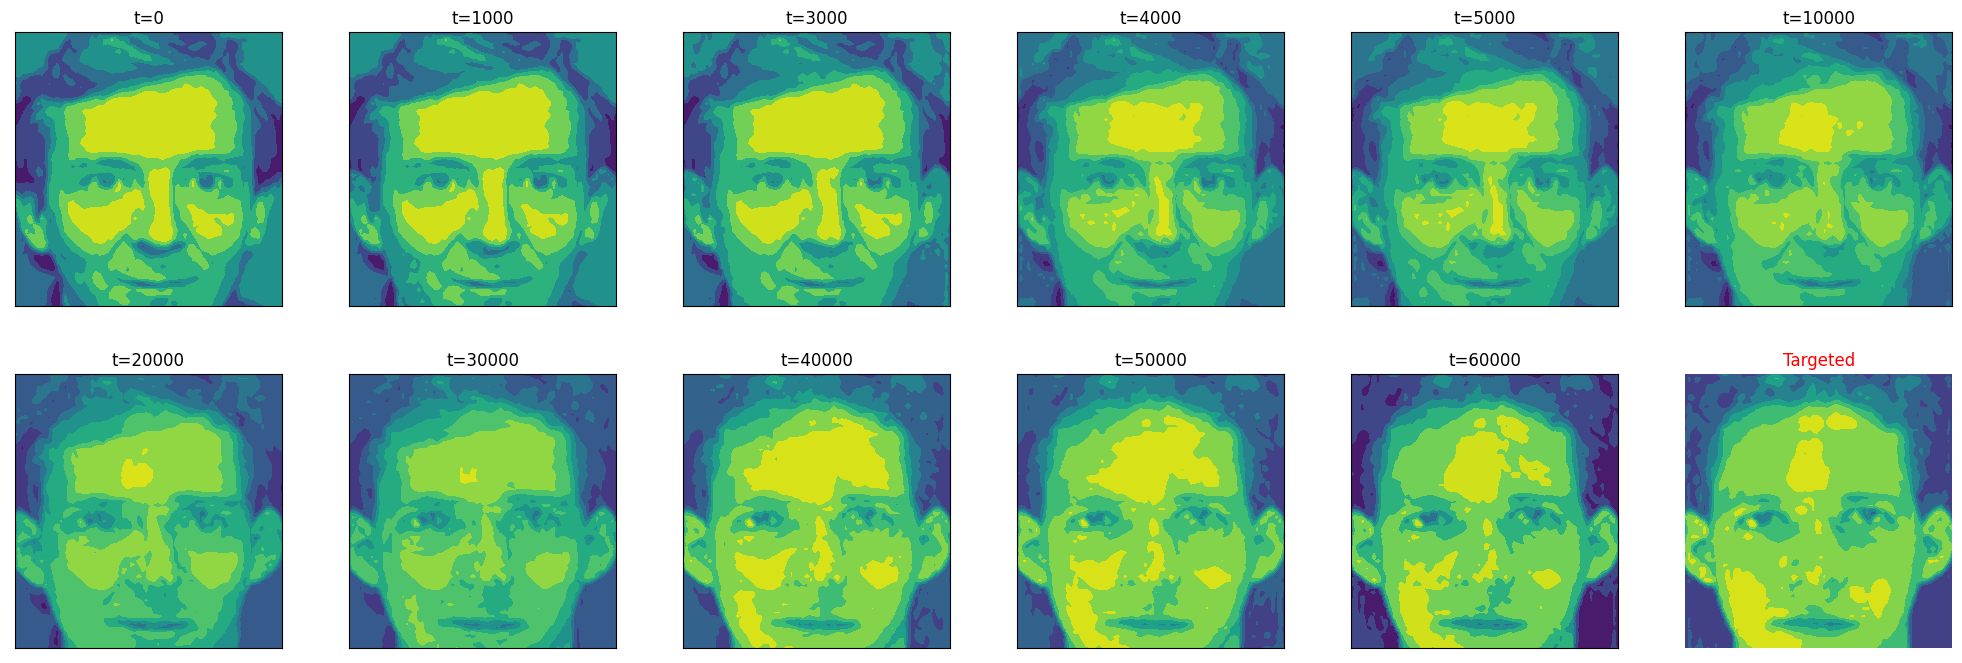

In [38]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib

norm = matplotlib.colors.Normalize(vmin=0, vmax=2)

#from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(25,8))

# Make data. Draw 0
X = np.arange(0, min_side, 1)
Y = np.arange(0, min_side, 1)
X, Y = np.meshgrid(X, Y)

ite_list = [0,1000,3000,4000,5000,10000,20000, 30000, 40000, 50000,60000] #[0,50,150,250,350, 550]

rows = 2
columns = 6

grid = plt.GridSpec(rows, columns, wspace = .25, hspace = .25)

for i in ite_list:
    j = ite_list.index(i)
    def f_t_plt(X,Y):
        '''
        change here
        '''
        obj = f_t_o[i].reshape(min_side,min_side)
        Z = obj[X,Y] # here we need to change the type to ap.array
        return Z

    Z = np.array(f_t_plt(X, Y)) # here we need to change the type to ap.array
    
    
    
    # Plot the surface.
    #ax = fig.add_subplot(1, len(ite_list)+1, j+1)
    exec(f"ax=fig.add_subplot(grid{[j]})")
    plt.contourf(Y, -X, Z, antialiased=False)
    
    ax.set_xticks([])
    ax.set_yticks([])
    '''
    plt.axis('off')
    '''
    plt.title('t={}'.format(i))

exec(f"fig.add_subplot(grid{[11]})")

Z = np.array(f_sus_plt(X, Y))
surfsus = plt.contourf(Y, -X, Z, antialiased=False)
plt.axis('off')
plt.title('Targeted', color="r")

plt.show()
fig.savefig(save_path+'/2d face eta=0.05 B=one.pdf'.format(1,2),bbox_inches='tight')